In [1]:
import gym_data_analysis.data_processing as analysis
import yaml
import pandas as pd

In [2]:
config = None
with open("config.yaml") as f:
    config = yaml.safe_load(f)

raw_df = pd.read_csv(config["input_data"], delimiter=";", parse_dates=['Date'])
raw_df['Workout Duration'] = raw_df['Workout Duration'].apply(analysis.parse_duration)
raw_df

,Date,Workout Name,Exercise Name,Set Order,Weight,Weight Unit,Reps,RPE,Distance,Distance Unit,Seconds,Notes,Workout Notes,Workout Duration
0,2023-07-30 16:49:28,Arms,Bench Press (Dumbbell),1,14.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,44
1,2023-07-30 16:49:28,Arms,Bench Press (Dumbbell),2,12.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,44
2,2023-07-30 16:49:28,Arms,Bench Press (Dumbbell),3,12.0,kg,0.0,NaN,NaN,NaN,0,NaN,NaN,44
3,2023-07-30 16:49:28,Arms,Bicep Curl (Dumbbell),1,10.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,44
4,2023-07-30 16:49:28,Arms,Bicep Curl (Dumbbell),2,10.0,kg,8.0,NaN,NaN,NaN,0,NaN,NaN,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3192,2024-06-05 16:57:37,"Pull 1 (back, biceps)",Hammer Curl (Dumbbell),2,12.0,kg,9.0,NaN,NaN,NaN,0,NaN,NaN,51
3193,2024-06-05 16:57:37,"Pull 1 (back, biceps)",Hammer Curl (Dumbbell),3,12.0,kg,7.0,NaN,NaN,NaN,0,NaN,NaN,51
3194,2024-06-05 16:57:37,"Pull 1 (back, biceps)",Deadhang,1,NaN,NaN,NaN,NaN,NaN,km,30,NaN,NaN,51
3195,2024-06-05 16:57:37,"Pull 1 (back, biceps)",Deadhang,2,NaN,NaN,NaN,NaN,NaN,km,30,NaN,NaN,51


In [3]:
# df containing dates, workout names and workout duration
def workout_volume(group):
    return (group['Weight'] * group['Reps']).sum()

def workout_reps(group):
    return group['Reps'].sum()

grouped_df = raw_df.groupby(["Date", "Workout Name", "Workout Duration"]).agg(
    Workout_Volume=pd.NamedAgg(column='Weight', aggfunc=lambda x: workout_volume(raw_df.loc[x.index])),
    Total_Reps=pd.NamedAgg(column='Reps', aggfunc='sum')
).reset_index()
grouped_df

,Date,Workout Name,Workout Duration,Workout_Volume,Total_Reps
0,2023-07-30 16:49:28,Arms,44,2108.0,105.0
1,2023-08-01 16:16:08,Back and abs,43,3630.0,150.0
2,2023-08-03 15:08:07,Legs,50,7024.0,191.0
3,2023-08-05 13:07:31,Arms,50,2741.0,117.0
4,2023-08-06 09:01:55,Back and abs,53,4140.0,150.0
...,...,...,...,...,...
187,2024-05-28 16:02:00,"Push 2 (chest, shoulders, triceps)",72,3849.0,143.0
188,2024-06-01 09:28:04,"Pull 2 (back, biceps)",63,3661.0,96.0
189,2024-06-02 18:50:40,Legs & Core 2,63,6679.0,126.0
190,2024-06-04 19:14:52,"Push 1 (chest, tricep, shoulders)",59,2562.0,160.0


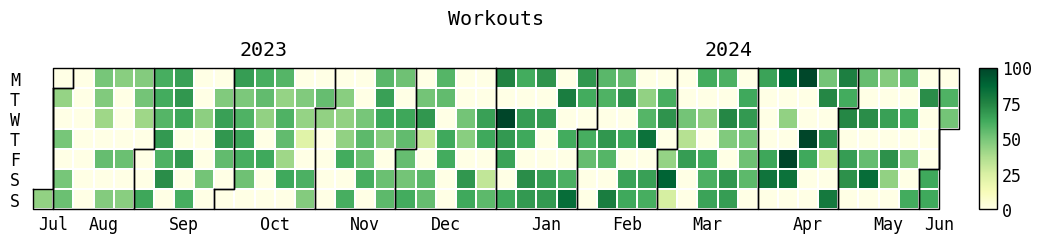

In [5]:
# display heatmap
analysis.plot_workouts_heatmap(grouped_df)

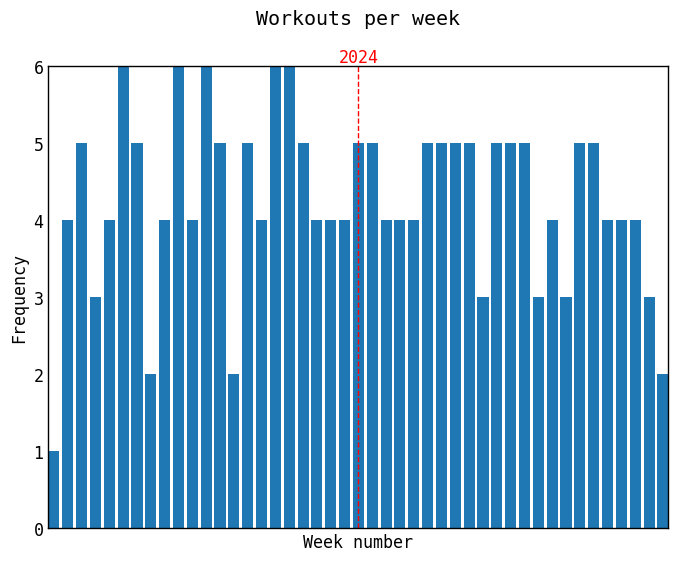

In [6]:
# display workout frequency
analysis.plot_weekly_workouts(grouped_df)

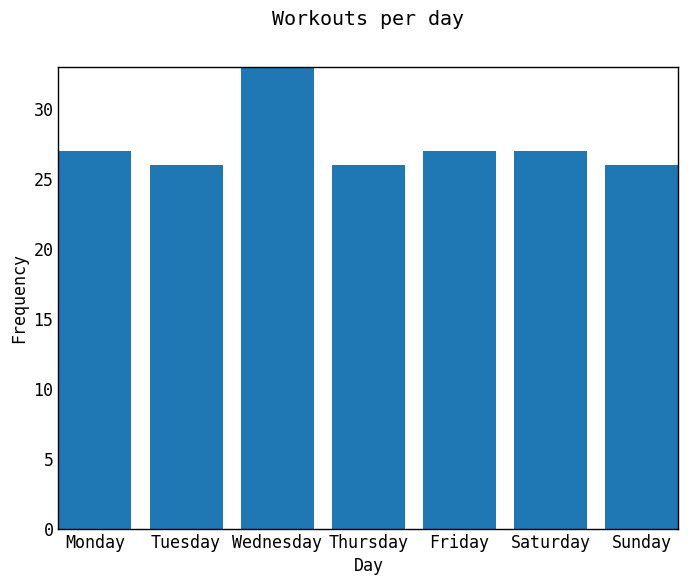

In [7]:
analysis.plot_daily_workouts(grouped_df)

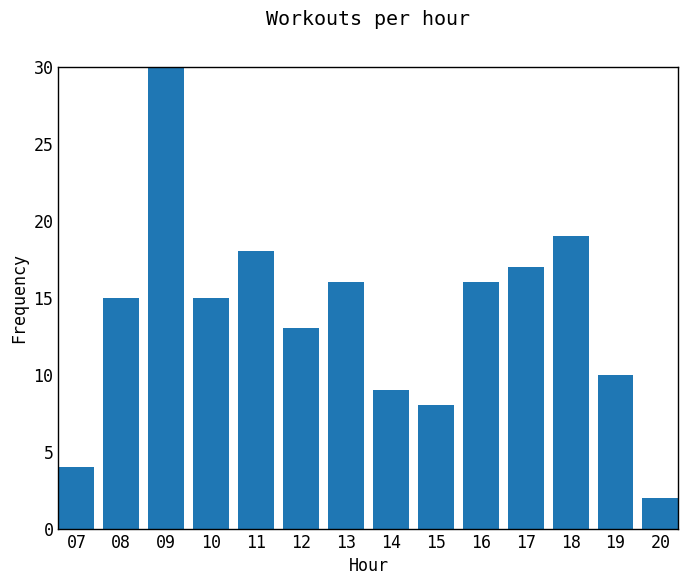

In [9]:
analysis.plot_hourly_workouts(grouped_df)